<a href="https://colab.research.google.com/github/Razgriz16/Sign-Language-IA/blob/main/sign_language_V_4E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pruebas

In [ ]:
import os
import random
import shutil
def mover_imagenes(carpeta_origen, carpeta_destino):
  for carpeta in os.listdir(carpeta_origen):
    # Obtenemos la lista de imágenes de la carpeta
    imagenes = os.listdir(os.path.join(carpeta_origen, carpeta))

    # Elegimos 10 imágenes aleatorias
    imagenes_aleatorias = random.sample(imagenes, 20)

    # Creamos la subcarpeta en la carpeta de destino
    subcarpeta_destino = os.path.join(carpeta_destino, carpeta)
    if not os.path.exists(subcarpeta_destino):
      os.mkdir(subcarpeta_destino)

    # Movemos las imágenes a la carpeta de destino
    for imagen in imagenes_aleatorias:
      os.rename(os.path.join(carpeta_origen, carpeta, imagen),
                 os.path.join(subcarpeta_destino, imagen))

def mover_de_vuelta(carpeta_origen="datasets_org/test_org", carpeta_destino="datasets_mixto/train"):

  for carpeta in os.listdir(carpeta_origen):
    ruta=os.path.join(carpeta_origen, carpeta)
    for elem in os.listdir(ruta):
      archivosOrigen=os.path.join(ruta, elem)
      shutil.move(archivosOrigen, os.path.join(carpeta_destino, carpeta))

def crear_carpetas(carpeta):
  abecedario = "abcdefghiklmnopqrstuvwxy"
  for folder_name in range(len(abecedario)):
    try:
      # Create the subfolder
      os.makedirs(os.path.join(carpeta, str.capitalize(abecedario[folder_name])))
      print(f"Successfully created folder '{abecedario[folder_name]}'")
    except OSError as error:
      print(f"Error creating folder '{abecedario[folder_name]}': {error}")


##Manejo colores y/o procesado

In [ ]:
import os
import cv2

def convColors(ruta_imagen):
# Lee la imagen
    imagen = cv2.imread(ruta_imagen)

    # Convierte la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Aplica un umbral para convertir la imagen en blanco y negro
    _, umbral = cv2.threshold(gris, 100, 255, cv2.THRESH_BINARY)

    # Invierte los colores para tener la mano blanca y el fondo negro
    mano_blanca_fondo_negro = cv2.bitwise_not(umbral)

    # Muestra la imagen original y la imagen resultante
    #cv2.imshow('Imagen Original', imagen)
    #cv2.imshow('Mano Blanca, Fondo Negro', mano_blanca_fondo_negro)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    return mano_blanca_fondo_negro

def aplicar_filtro(carpeta):
  """Aplica un filtro a todos los archivos de una carpeta y sus subcarpetas.

  Args:
    carpeta: La ruta a la carpeta a procesar.

  Returns:
    Ninguno.
  """

  for archivo in os.listdir(carpeta):
    ruta_archivo = os.path.join(carpeta, archivo)

    if os.path.isfile(ruta_archivo):
      # Si el archivo es una imagen, aplicamos el filtro.
      if archivo.endswith(".jpg") or archivo.endswith(".png"):
        # Aplicamos el filtro a la imagen.
        #imagen = cv2.imread(ruta_archivo)
        gray_frame = convColors(ruta_archivo)
        #gray_frame = cv2.GaussianBlur(gray, (9, 9), 0)
        cv2.imwrite(ruta_archivo, gray_frame)

      # Si el archivo no es una imagen, aplicamos el filtro.
      else:
        # Aplicamos el filtro al archivo.
        #imagen = cv2.imread(ruta_archivo)
        gray_frame = convColors(ruta_archivo)
        #gray_frame = cv2.GaussianBlur(gray, (9, 9), 0)
        cv2.imwrite(ruta_archivo, gray_frame)

      # Si el archivo es un directorio, iteramos sobre sus contenidos.
    elif os.path.isdir(ruta_archivo):
      aplicar_filtro(ruta_archivo)






In [ ]:
carpeta = "/content/datasets_ia/datasets"
aplicar_filtro(carpeta)

(480, 640, 3)


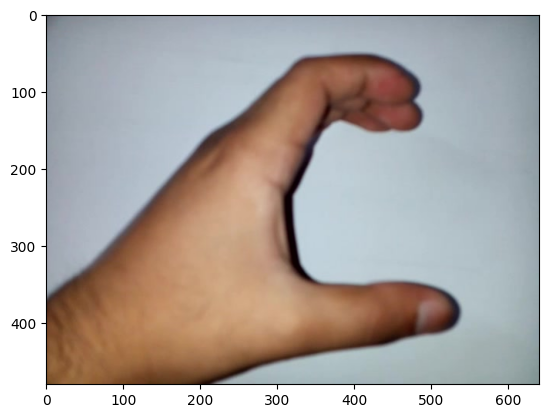

In [ ]:
image=cv2.imread("/content/datasets_ia/datasets/train/C/007.jpg")
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

###reescalamiento de los datos (agregar mas datos)

In [ ]:
def resize_image(folder_path):
    for folder in os.listdir(folder_path):
        if len(os.listdir(os.path.join(folder_path, folder))) < 50:
            for image_path in os.listdir(os.path.join(folder_path, folder)):
                image = cv2.imread(os.path.join(folder_path, folder, image_path))
                half = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), (int(image.shape[0]/2), int(image.shape[1]/2)))
                cv2.imwrite(os.path.join(folder_path, folder, "Half" + image_path ), half)


(320, 240, 3)


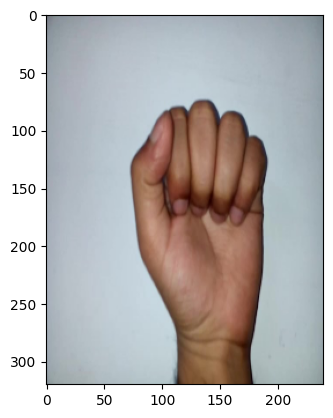

In [ ]:
image=cv2.imread("/content/datasets_ia/datasets/train/A/006.jpg")
half = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), (int(image.shape[0]/2), int(image.shape[1]/2)))
print(half.shape)
plt.imshow(half)

##Comienzo

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from sklearn.metrics import classification_report, log_loss, accuracy_score, confusion_matrix
from tqdm import tqdm
import os

In [ ]:
!git clone https://github.com/Razgriz16/datasets_ia.git

Cloning into 'datasets_ia'...
remote: Enumerating objects: 10125, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 10125 (delta 0), reused 1 (delta 0), pack-reused 10123
Receiving objects: 100% (10125/10125), 139.75 MiB | 16.02 MiB/s, done.
Resolving deltas: 100% (737/737), done.
Updating files: 100% (14836/14836), done.


##Analisis exploratorio

Revisamos como están compuestas las carpetas que usaremos

In [ ]:
directorio ="/content/datasets_ia/datasets/train"# carpeta de entrenamiento
Name = os.listdir(directorio)

print(Name)

['U', 'D', 'O', 'E', 'S', 'F', 'W', 'M', 'B', 'A', 'R', 'Q', 'L', 'X', 'K', 'G', 'C', 'Y', 'I', 'P', 'T', 'N', 'V', 'H']


In [ ]:
#le asignamos los valores correspondientes a las letras
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

In [ ]:
print(normal_mapping)
print(reverse_mapping)

{'U': 0, 'D': 1, 'O': 2, 'E': 3, 'S': 4, 'F': 5, 'W': 6, 'M': 7, 'B': 8, 'A': 9, 'R': 10, 'Q': 11, 'L': 12, 'X': 13, 'K': 14, 'G': 15, 'C': 16, 'Y': 17, 'I': 18, 'P': 19, 'T': 20, 'N': 21, 'V': 22, 'H': 23}
{0: 'U', 1: 'D', 2: 'O', 3: 'E', 4: 'S', 5: 'F', 6: 'W', 7: 'M', 8: 'B', 9: 'A', 10: 'R', 11: 'Q', 12: 'L', 13: 'X', 14: 'K', 15: 'G', 16: 'C', 17: 'Y', 18: 'I', 19: 'P', 20: 'T', 21: 'N', 22: 'V', 23: 'H'}


Seleccionamos una imagen random para ver las propiedades de esta

(480, 640, 3)
480


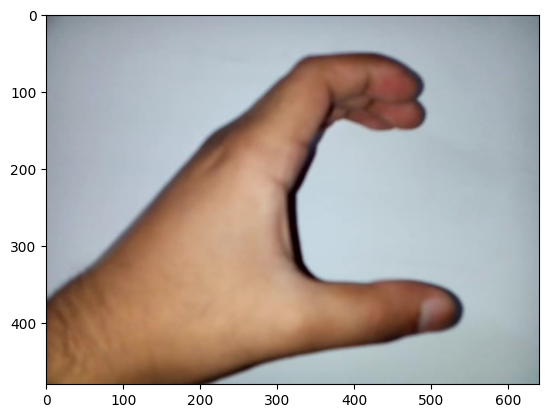

In [ ]:
image=cv2.imread("/content/datasets_ia/datasets/train/C/006.jpg")
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print(image.shape[0])

Cuenta de datos


In [ ]:
cant_datos=[]
datanames=[]
train_path="/content/datasets_ia/datasets/train"

for carpeta in os.listdir(train_path):
  ruta=os.path.join(train_path, carpeta)
  datanames.append(carpeta)
  cant_datos.append(len(os.listdir(ruta)))

print(cant_datos)
print(datanames)
pd.Series(cant_datos, datanames)

[70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
['U', 'D', 'O', 'E', 'S', 'F', 'W', 'M', 'B', 'A', 'R', 'Q', 'L', 'X', 'K', 'G', 'C', 'Y', 'I', 'P', 'T', 'N', 'V', 'H']


U    70
D    70
O    70
E    70
S    70
F    70
W    70
M    70
B    70
A    70
R    70
Q    70
L    70
X    70
K    70
G    70
C    70
Y    70
I    70
P    70
T    70
N    70
V    70
H    70
dtype: int64

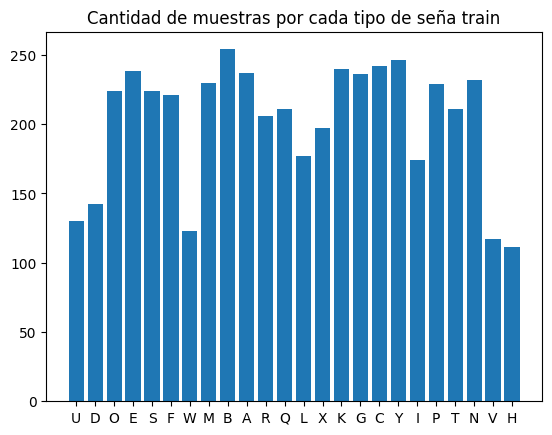

In [ ]:
# Creamos la gráfica
plt.bar(datanames, cant_datos)
# Agregamos un título a la gráfica
plt.title("Cantidad de muestras por cada tipo de seña carpeta train")

# Mostramos la gráfica
plt.show()

##Pre-Procesado (Manejo de archivos)


###Eliminar imagenes de test

In [ ]:
def eliminar_imagenes(folder_path):
    for folder in os.listdir(folder_path):
        if len(os.listdir(os.path.join(folder_path, folder))) < 50:
            for image_path in os.listdir(os.path.join(folder_path, folder)):
                os.remove(os.path.join(folder_path, folder, image_path))


In [ ]:
eliminar_imagenes("/content/datasets_ia/datasets/test")

###Movimiento de archivos

In [ ]:
def mover_imagenes(carpeta_origen, carpeta_destino):
  for carpeta in os.listdir(carpeta_origen):
    # Obtenemos la lista de imágenes de la carpeta
    imagenes = os.listdir(os.path.join(carpeta_origen, carpeta))

    # Elegimos 10 imágenes aleatorias
    imagenes_aleatorias = random.sample(imagenes, int(0.15 * len(imagenes)))

    # Creamos la subcarpeta en la carpeta de destino
    subcarpeta_destino = os.path.join(carpeta_destino, carpeta)
    if not os.path.exists(subcarpeta_destino):
      os.mkdir(subcarpeta_destino)

    # Movemos las imágenes a la carpeta de destino
    for imagen in imagenes_aleatorias:
      os.rename(os.path.join(carpeta_origen, carpeta, imagen),
                 os.path.join(subcarpeta_destino, imagen))

In [ ]:
mover_imagenes("/content/datasets_ia/datasets/train", "/content/datasets_ia/datasets/test")

In [ ]:
cant_datos_test=[]
datanames_test=[]
train_path="/content/datasets_ia/datasets/test"

for carpeta in os.listdir(train_path):
  ruta=os.path.join(train_path, carpeta)
  datanames_test.append(carpeta)
  cant_datos_test.append(len(os.listdir(ruta)))

print(cant_datos_test)
print(datanames_test)
pd.Series(cant_datos_test, datanames_test)

[19, 21, 33, 35, 33, 33, 18, 34, 38, 35, 30, 31, 26, 29, 36, 35, 36, 36, 26, 34, 31, 34, 17, 16]
['U', 'D', 'O', 'E', 'S', 'F', 'W', 'M', 'B', 'A', 'R', 'Q', 'L', 'X', 'K', 'G', 'C', 'Y', 'I', 'P', 'T', 'N', 'V', 'H']


U    19
D    21
O    33
E    35
S    33
F    33
W    18
M    34
B    38
A    35
R    30
Q    31
L    26
X    29
K    36
G    35
C    36
Y    36
I    26
P    34
T    31
N    34
V    17
H    16
dtype: int64

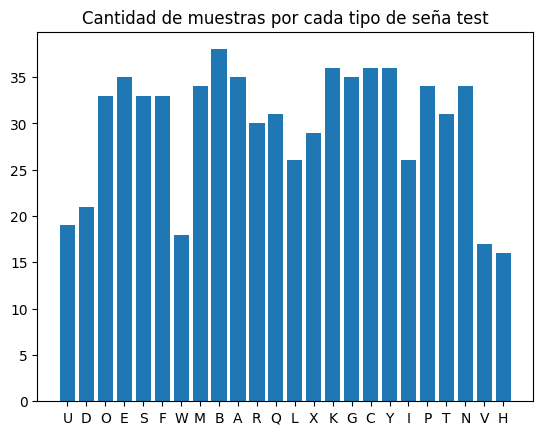

In [ ]:
# Creamos la gráfica
plt.bar(datanames_test, cant_datos_test)
# Agregamos un título a la gráfica
plt.title("Cantidad de muestras por cada tipo de seña test")

# Mostramos la gráfica
plt.show()

###Ajuste de datos train

In [ ]:
def ajustar_cantidad_archivos(carpeta_raiz):
    try:
        for carpeta, subcarpetas, archivos in os.walk(carpeta_raiz):
            # Contar la cantidad de archivos en la carpeta actual
            cantidad_archivos = len(archivos)
            print(f'La carpeta "{carpeta}" tiene {cantidad_archivos} archivos.')

            # Verificar si hay más de 70 archivos
            if cantidad_archivos > 70:
                print(f'Hay más de 70 archivos en la carpeta "{carpeta}". Eliminando el exceso...')

                # Ordenar los archivos por fecha de creación (puedes cambiar a otro criterio si es necesario)
                archivos.sort(key=lambda x: os.path.getctime(os.path.join(carpeta, x)))

                # Eliminar el exceso de archivos
                archivos_a_eliminar = archivos[70:]
                for archivo in archivos_a_eliminar:
                    ruta_archivo = os.path.join(carpeta, archivo)
                    os.remove(ruta_archivo)
                    print(f'Se eliminó el archivo: {ruta_archivo}')

                print(f'Se han dejado 70 archivos en la carpeta "{carpeta}".')

    except FileNotFoundError:
        print(f'La carpeta "{carpeta_raiz}" no existe.')


In [ ]:
ajustar_cantidad_archivos("/content/datasets_ia/datasets/train")

La carpeta "/content/datasets_ia/datasets/train" tiene 0 archivos.
La carpeta "/content/datasets_ia/datasets/train/U" tiene 111 archivos.
Hay más de 70 archivos en la carpeta "/content/datasets_ia/datasets/train/U". Eliminando el exceso...
Se eliminó el archivo: /content/datasets_ia/datasets/train/U/104.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/train/U/105.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/train/U/106.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/train/U/107.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/train/U/108.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/train/U/110.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/train/U/109.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/train/U/112.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/train/U/111.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/train/U/113.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/train/U/114.jpg
S

In [ ]:
cant_datos_train=[]
datanames_train=[]
train_path="/content/datasets_ia/datasets/train"
for carpeta in os.listdir(train_path):
  ruta=os.path.join(train_path, carpeta)
  datanames_train.append(carpeta)
  cant_datos_train.append(len(os.listdir(ruta)))

print(cant_datos_train)
print(datanames_train)
pd.Series(cant_datos_train, datanames_train)

[70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
['U', 'D', 'O', 'E', 'S', 'F', 'W', 'M', 'B', 'A', 'R', 'Q', 'L', 'X', 'K', 'G', 'C', 'Y', 'I', 'P', 'T', 'N', 'V', 'H']


U    70
D    70
O    70
E    70
S    70
F    70
W    70
M    70
B    70
A    70
R    70
Q    70
L    70
X    70
K    70
G    70
C    70
Y    70
I    70
P    70
T    70
N    70
V    70
H    70
dtype: int64

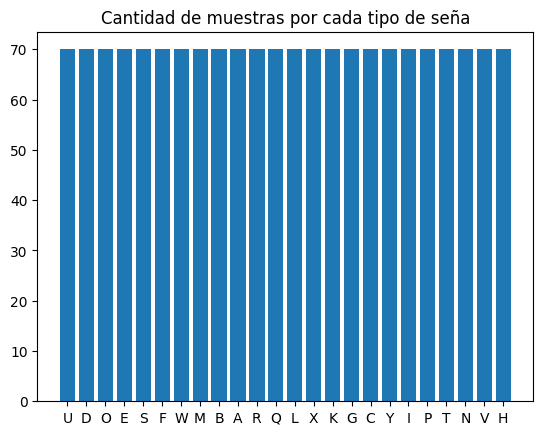

In [ ]:
# Creamos la gráfica
plt.bar(datanames_train, cant_datos_train)
# Agregamos un título a la gráfica
plt.title("Cantidad de muestras por cada tipo de seña")

# Mostramos la gráfica
plt.show()

###Ajuste de datos test

In [ ]:
def ajustar_cantidad_archivos_test(carpeta_raiz):
    try:
        for carpeta, subcarpetas, archivos in os.walk(carpeta_raiz):
            # Contar la cantidad de archivos en la carpeta actual
            cantidad_archivos = len(archivos)
            print(f'La carpeta "{carpeta}" tiene {cantidad_archivos} archivos.')

            # Verificar si hay más de 25 archivos
            if cantidad_archivos > 25:
                print(f'Hay más de 25 archivos en la carpeta "{carpeta}". Eliminando el exceso...')

                # Ordenar los archivos por fecha de creación (puedes cambiar a otro criterio si es necesario)
                archivos.sort(key=lambda x: os.path.getctime(os.path.join(carpeta, x)))

                # Eliminar el exceso de archivos
                archivos_a_eliminar = archivos[25:]
                for archivo in archivos_a_eliminar:
                    ruta_archivo = os.path.join(carpeta, archivo)
                    os.remove(ruta_archivo)
                    print(f'Se eliminó el archivo: {ruta_archivo}')

                print(f'Se han dejado 25 archivos en la carpeta "{carpeta}".')

    except FileNotFoundError:
        print(f'La carpeta "{carpeta_raiz}" no existe.')

In [ ]:
ajustar_cantidad_archivos_test("/content/datasets_ia/datasets/test")

La carpeta "/content/datasets_ia/datasets/test" tiene 0 archivos.
La carpeta "/content/datasets_ia/datasets/test/U" tiene 19 archivos.
La carpeta "/content/datasets_ia/datasets/test/D" tiene 21 archivos.
La carpeta "/content/datasets_ia/datasets/test/O" tiene 33 archivos.
Hay más de 25 archivos en la carpeta "/content/datasets_ia/datasets/test/O". Eliminando el exceso...
Se eliminó el archivo: /content/datasets_ia/datasets/test/O/078.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/test/O/148.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/test/O/051.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/test/O/042.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/test/O/075.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/test/O/182.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/test/O/140.jpg
Se eliminó el archivo: /content/datasets_ia/datasets/test/O/208.jpg
Se han dejado 25 archivos en la carpeta "/content/datasets_ia/datasets/test/O".
La

In [ ]:
cant_datos_test_ajustado=[]
datanames_test_ajustado=[]
test_path="/content/datasets_ia/datasets/test"
for carpeta in os.listdir(test_path):
  ruta=os.path.join(test_path, carpeta)
  datanames_test_ajustado.append(carpeta)
  cant_datos_test_ajustado.append(len(os.listdir(ruta)))

print(cant_datos_test_ajustado)
print(datanames_test_ajustado)
pd.Series(cant_datos_test_ajustado, datanames_test_ajustado)

[19, 21, 25, 25, 25, 25, 18, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 17, 16]
['U', 'D', 'O', 'E', 'S', 'F', 'W', 'M', 'B', 'A', 'R', 'Q', 'L', 'X', 'K', 'G', 'C', 'Y', 'I', 'P', 'T', 'N', 'V', 'H']


U    19
D    21
O    25
E    25
S    25
F    25
W    18
M    25
B    25
A    25
R    25
Q    25
L    25
X    25
K    25
G    25
C    25
Y    25
I    25
P    25
T    25
N    25
V    17
H    16
dtype: int64

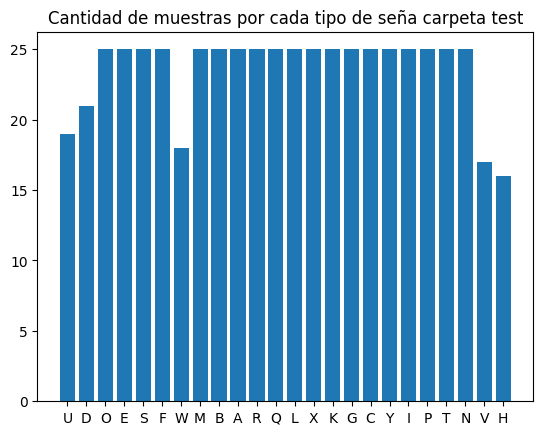

In [ ]:
# Creamos la gráfica
plt.bar(datanames_test_ajustado, cant_datos_test_ajustado)
# Agregamos un título a la gráfica
plt.title("Cantidad de muestras por cada tipo de seña carpeta test")

# Mostramos la gráfica
plt.show()

##Modelamiento VGG16




Found 1680 images belonging to 24 classes.
Found 566 images belonging to 24 classes.


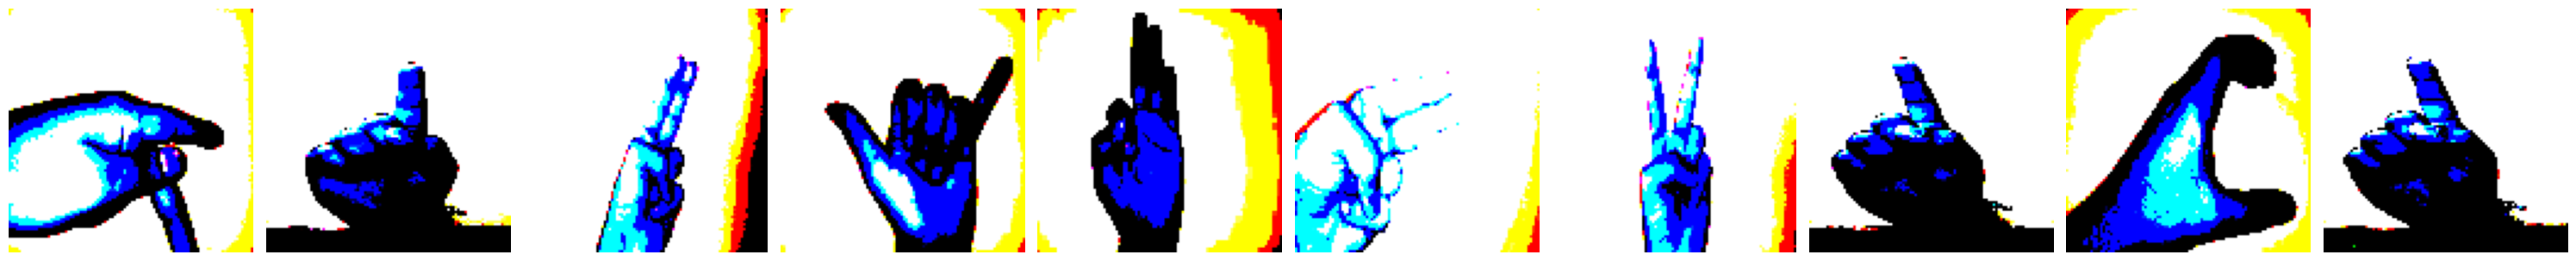

(1680, 100, 100, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


KeyboardInterrupt: ignored

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

train_path = r'/content/datasets_ia/datasets/train'
test_path = r'/content/datasets_ia/datasets/test'

#pre procesamiento de datos: redimensiona las imagenes, normalizandolas para que tengan un tamaño similar
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(100,100), class_mode='categorical', batch_size=1680,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(100,100), class_mode='categorical', batch_size=600, shuffle=True)

imgs, labels = next(train_batches)


#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(24,activation ="softmax"))


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')


history2 = model.fit(train_batches, epochs=100, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches)

imgs, labels = next(test_batches)

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.save('modelo_vgg16.h5')

print(history2.history)

print(imgs.shape)







###Resultados VGG16

In [ ]:
imgs, labels = next(test_batches)
model = keras.models.load_model(r"best_model_colab_procesado.h5")
model.summary()

y_pred=model.predict(imgs, verbose=0)
pred=np.argmax(y_pred, axis=1)
ground = np.argmax(labels, axis=1)
#set=set()
#for i in range(len(ground)):
#    set.add(word_dict.get(ground[i]))
print(classification_report(ground, pred))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 49, 49, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 11, 11, 128)      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Matriz de confusion VGG16

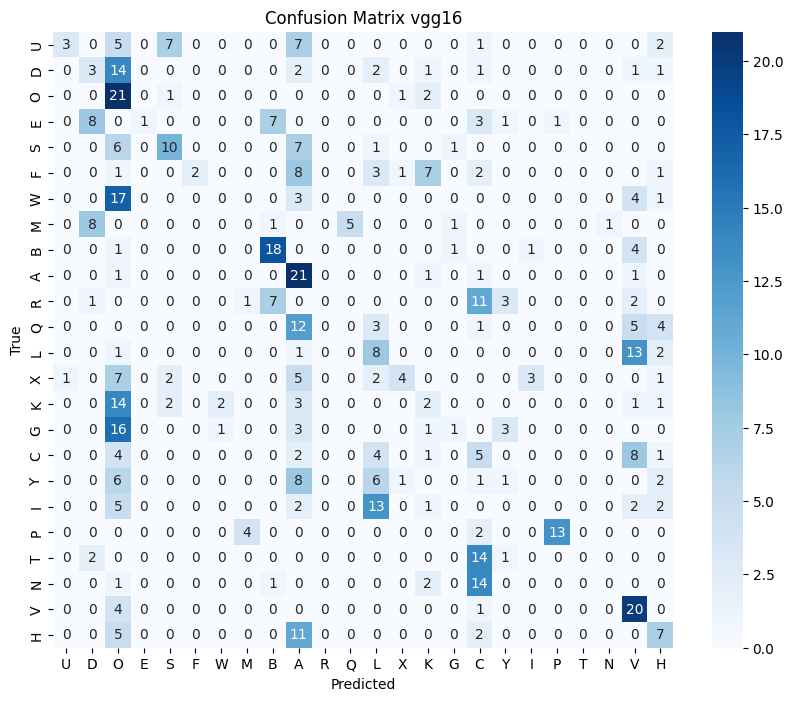

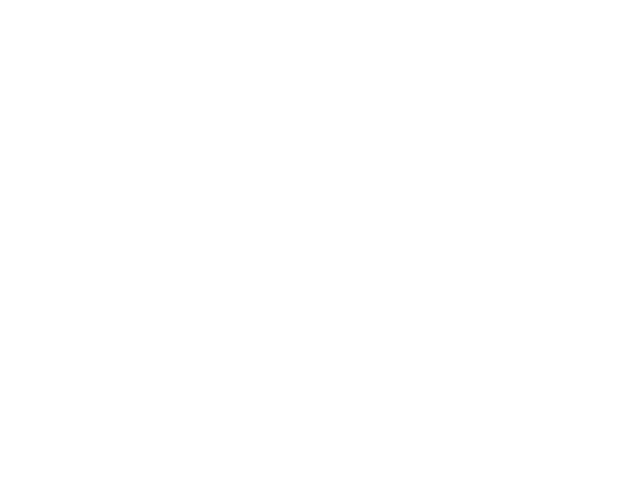

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
# Visualiza el informe como un gráfico de calor utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(ground, pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=list(reverse_mapping.values()), yticklabels=list(reverse_mapping.values()))
plt.title('Confusion Matrix vgg16')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Guarda el gráfico como una imagen
plt.savefig('classification_report.png')

# Muestra la imagen en el cuaderno
Image("classification_report.png")

###Summary exportado vgg16

In [ ]:
from keras.utils import plot_model
from IPython.display import Image

# Carga del modelo
model = keras.models.load_model(r"modelo_vgg16.h5")

# Guarda el resumen del modelo como una imagen
plot_model(model, to_file='model_summary.png', show_shapes=True, show_layer_names=True)

# Muestra la imagen en el cuaderno
Image("model_summary.png")

In [ ]:
predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
for ind, i in enumerate(predictions):
    print(reverse_mapping[np.argmax(i)], end='   ')

#plotImages(imgs)
print('\nActual labels')
for i in labels:
    print(reverse_mapping[np.argmax(i)], end='   ')


predictions on a small set of test data--
Y   S   X   V   F   X   T   U   D   B   I   Q   A   D   H   L   L   F   H   T   G   O   I   H   D   M   R   X   R   R   G   U   W   I   K   K   B   N   G   F   B   F   N   H   B   T   U   P   F   W   D   Y   X   H   E   G   G   U   R   X   F   L   K   O   U   S   W   I   G   R   V   D   U   S   C   R   W   C   F   E   V   O   M   B   P   S   F   R   I   Y   L   Y   S   A   Y   C   U   L   W   W   M   V   K   A   Y   A   U   G   V   A   E   W   L   H   K   D   E   V   O   I   R   Y   H   P   L   I   A   L   F   I   F   H   I   O   Q   V   O   D   E   N   P   Y   Q   X   A   E   K   Q   Y   D   Q   Y   F   G   C   A   I   A   S   S   F   T   N   V   W   R   D   I   Q   C   R   U   C   R   B   W   K   N   F   L   G   S   R   R   X   G   F   G   K   R   B   A   Y   M   S   B   T   F   A   G   P   P   B   C   O   M   I   N   Q   Y   E   K   X   S   X   V   F   Y   X   F   S   R   S   I   H   X   G   R   R   A   V   B   A   I   M   T   X   C   V   Y 

In [ ]:
fig, axes = plt.subplots(4, 6, figsize=(30,20))
axes = axes.flatten()

predict=[]
for ind, i in enumerate(predictions):
  predict.append(reverse_mapping[np.argmax(i)])

etiq=[]
for j in labels:
  etiq.append(reverse_mapping[np.argmax(j)])

for k, h, img, ax in zip(etiq, predict, imgs, axes) :
    ax.set_title(k+"=="+ h)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

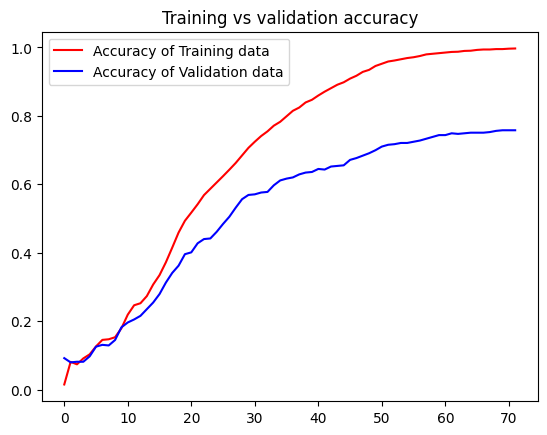

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = history2.history['accuracy']
value_acc = history2.history['val_accuracy']
get_loss = history2.history['loss']
validation_loss = history2.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

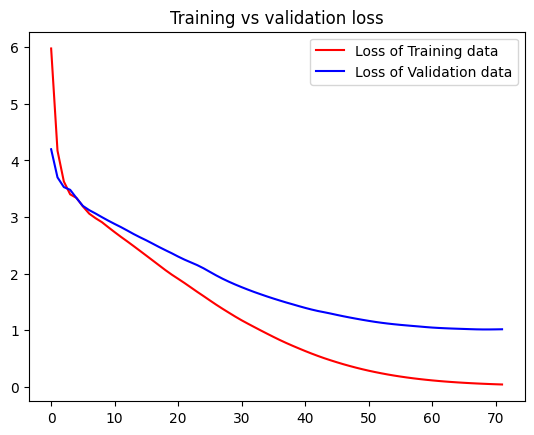

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()



##Modelamiento Resnet OP

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

# Definir la arquitectura de ResNet
def create_resnet_model(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model
# Configuración de rutas de datos
train_path = r"/content/datasets_ia/datasets/train"


# Configuración de generadores de datos
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.resnet.preprocess_input).flow_from_directory(directory=train_path, target_size=(100,100), class_mode='categorical', batch_size=1680)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.resnet.preprocess_input).flow_from_directory(directory=test_path, target_size=(100,100), class_mode='categorical', batch_size=600)

imgs, labels = next(train_batches)

# Crear el modelo
num_classes = 24
input_shape = (100, 100, 3)  # 3 canales de color para imágenes RGB
model_resnet = create_resnet_model(input_shape, num_classes)

# Compilar el modelo
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Configurar callbacks (early stop y reducción de la tasa de aprendizaje)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

# Entrenar el modelo
history_resnet = model_resnet.fit(train_batches, epochs=100, validation_data=test_batches, callbacks=[reduce_lr, early_stop])
imgs, labels = next(train_batches)

imgs, labels = next(test_batches)

scores = model_resnet.evaluate(imgs, labels, verbose=0)
print(f'{model_resnet.metrics_names[0]} of {scores[0]}; {model_resnet.metrics_names[1]} of {scores[1]*100}%')

# Guardar el modelo
model_resnet.save('modelo_resnet.h5')

history_resnet.history

Found 1680 images belonging to 24 classes.
Found 566 images belonging to 24 classes.
Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 4.2368 - accuracy: 0.0845 - val_loss: 4.0996 - val_accuracy: 0.0830 - lr: 1.0000e-04
Epoch 2/100
1/1 [==============================] - 9s 9s/step - loss: 4.1287 - accuracy: 0.0863 - val_loss: 4.0037 - val_accuracy: 0.0830 - lr: 1.0000e-04
Epoch 3/100
1/1 [==============================] - 10s 10s/step - loss: 4.0252 - accuracy: 0.0857 - val_loss: 3.9124 - val_accuracy: 0.0883 - lr: 1.0000e-04
Epoch 4/100
1/1 [==============================] - 8s 8s/step - loss: 3.9264 - accuracy: 0.0857 - val_loss: 3.8257 - val_accuracy: 0.0901 - lr: 1.0000e-04
Epoch 5/100
1/1 [==============================] - 10s 10s/step - loss: 3.8322 - accuracy: 0.0857 - val_loss: 3.7434 - val_accuracy: 0.0919 - lr: 1.0000e-04
Epoch 6/100
1/1 [==============================] - 12s 12s/step - loss: 3.7424 - accuracy: 0.0857 - val_loss: 3.6652 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


{'loss': [4.236784934997559,
  4.128683090209961,
  4.025212287902832,
  3.926396608352661,
  3.83217453956604,
  3.7424025535583496,
  3.656872034072876,
  3.575327157974243,
  3.497485399246216,
  3.423046112060547,
  3.351708173751831,
  3.2831790447235107,
  3.217179536819458,
  3.1534485816955566,
  3.0917463302612305,
  3.0318539142608643,
  2.9735734462738037,
  2.9167323112487793,
  2.861177682876587,
  2.8067822456359863,
  2.7534403800964355,
  2.7010700702667236,
  2.6496105194091797,
  2.59902024269104,
  2.54927396774292,
  2.5003623962402344,
  2.4522852897644043,
  2.405050039291382,
  2.358668327331543,
  2.313153028488159,
  2.2685155868530273,
  2.224764585494995,
  2.1819040775299072,
  2.13993239402771,
  2.098843812942505,
  2.058627128601074,
  2.0192675590515137,
  1.9807480573654175,
  1.9430490732192993,
  1.9061514139175415,
  1.8700356483459473,
  1.8346842527389526,
  1.8000808954238892,
  1.7662118673324585,
  1.7330647706985474,
  1.7006299495697021,
  1.6

###Resultados ResnetV50

In [ ]:
model_resnet = keras.models.load_model(r"modelo_resnet.h5")
model_resnet.summary()

y_pred_resnet=model_resnet.predict(imgs, verbose=0)
pred_resnet=np.argmax(y_pred_resnet, axis=1)
ground_resnet = np.argmax(labels, axis=1)

print(classification_report(ground_resnet, pred_resnet))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_7 (Dense)             (None, 24)                49176     
                                                                 
Total params: 23636888 (90.17 MB)
Trainable params: 49176 (192.09 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        25
           1       0.47      0.76      0.58        25
           2       1.00      0.68      0.81

###Matriz de confusion resnetv50

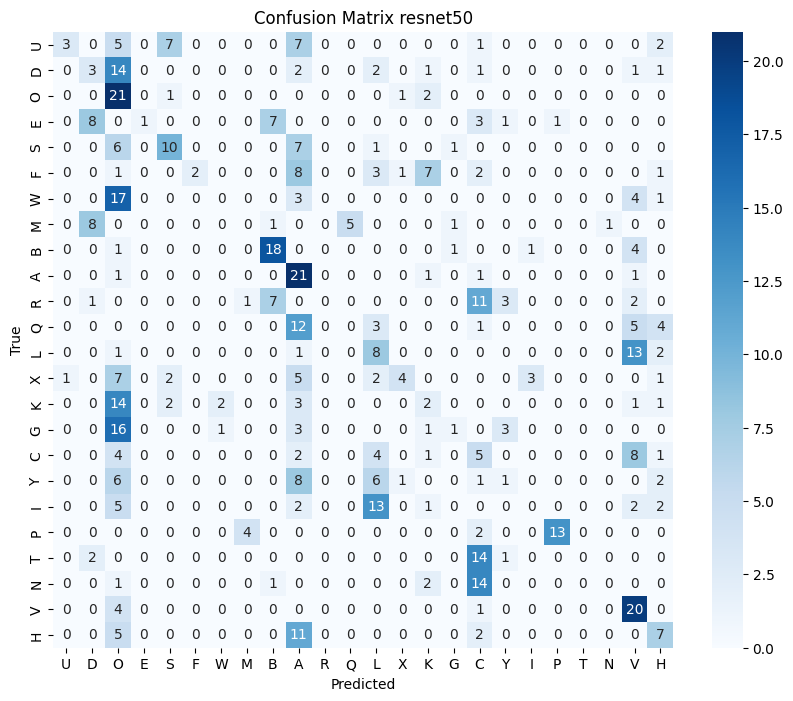

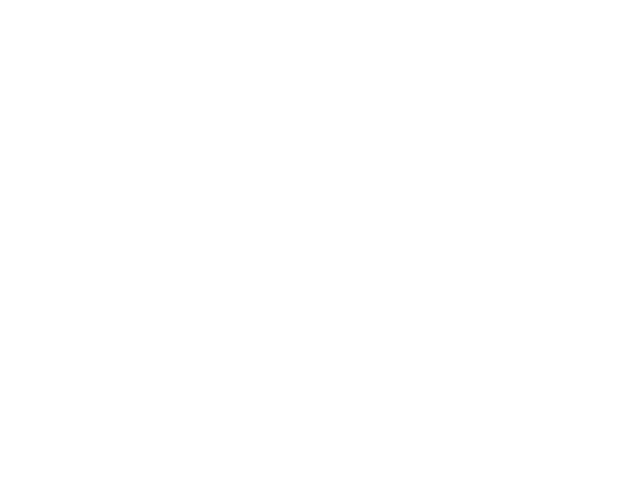

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
# Visualiza el informe como un gráfico de calor utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(ground, pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=list(reverse_mapping.values()), yticklabels=list(reverse_mapping.values()))
plt.title('Confusion Matrix resnet50')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Guarda el gráfico como una imagen
plt.savefig('classification_report.png')

# Muestra la imagen en el cuaderno
Image("classification_report.png")

###Summary con pandas Resnet

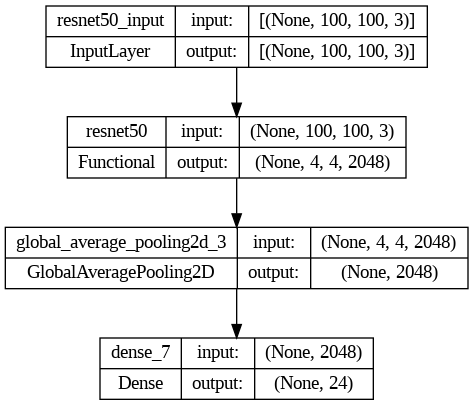

In [ ]:
from keras.utils import plot_model
from IPython.display import Image

# Carga del modelo
model = keras.models.load_model(r"modelo_resnet.h5")

# Guarda el resumen del modelo como una imagen
plot_model(model, to_file='model_summary_resnet.png', show_shapes=True, show_layer_names=True)

# Muestra la imagen en el cuaderno
Image("model_summary_resnet.png")

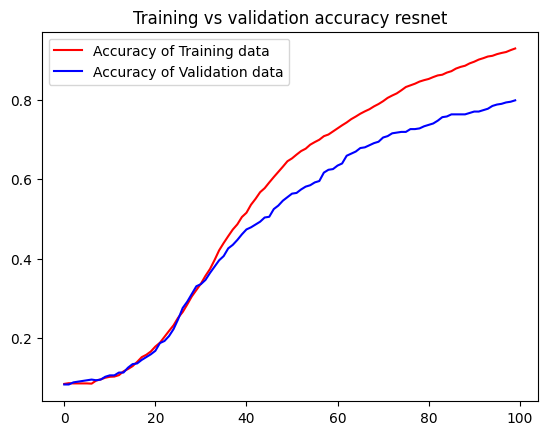

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = history_resnet.history['accuracy']
value_acc = history_resnet.history['val_accuracy']
get_loss = history_resnet.history['loss']
validation_loss = history_resnet.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy resnet')
plt.legend(loc=0)
plt.figure()
plt.show()

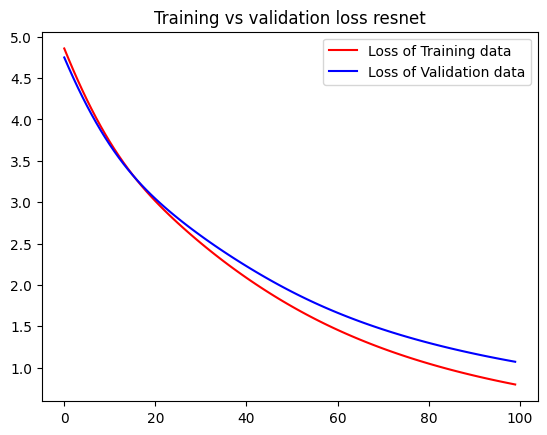

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss resnet')
plt.legend(loc=0)
plt.figure()
plt.show()

##Xception

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras import layers, models

# Definir la arquitectura de Xception
def create_Xception_model(input_shape, num_classes):
    base_model = tf.keras.applications.Xception(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

train_path = r"/content/datasets_ia/datasets/train"
test_path = r"/content/datasets_ia/datasets/test"

train_batches = ImageDataGenerator(preprocessing_function=keras.applications.xception.preprocess_input).flow_from_directory(directory=train_path, target_size=(100, 100), class_mode='categorical', batch_size=1680)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.xception.preprocess_input).flow_from_directory(directory=test_path, target_size=(100, 100), class_mode='categorical', batch_size=600)
imgs, labels = next(train_batches)


#Crear el modelo
num_classes = 24
input_shape = (100, 100, 3)
model_Xception = create_Xception_model(input_shape, num_classes)

model_Xception.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

history_Xception = model_Xception.fit(train_batches, epochs=100, validation_data=test_batches, callbacks=[reduce_lr, early_stop])
imgs, labels = next(train_batches)

imgs, labels = next(test_batches)

scores = model_Xception.evaluate(imgs, labels, verbose=0)
print(f'{model_Xception.metrics_names[0]} of {scores[0]}; {model_Xception.metrics_names[1]} of {scores[1]*100}%')

# Opcional: Guardar el modelo
model_Xception.save('modelo_Xception.h5')

# Opcional: Mostrar el historial
print(history_Xception.history)


Found 1680 images belonging to 24 classes.
Found 566 images belonging to 24 classes.
Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 3.3327 - accuracy: 0.0506 - val_loss: 3.3442 - val_accuracy: 0.0548 - lr: 1.0000e-04
Epoch 2/100
1/1 [==============================] - 8s 8s/step - loss: 3.3047 - accuracy: 0.0560 - val_loss: 3.3183 - val_accuracy: 0.0548 - lr: 1.0000e-04
Epoch 3/100
1/1 [==============================] - 8s 8s/step - loss: 3.2771 - accuracy: 0.0613 - val_loss: 3.2928 - val_accuracy: 0.0565 - lr: 1.0000e-04
Epoch 4/100
1/1 [==============================] - 8s 8s/step - loss: 3.2498 - accuracy: 0.0655 - val_loss: 3.2676 - val_accuracy: 0.0618 - lr: 1.0000e-04
Epoch 5/100
1/1 [==============================] - 9s 9s/step - loss: 3.2229 - accuracy: 0.0714 - val_loss: 3.2428 - val_accuracy: 0.0636 - lr: 1.0000e-04
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 3.1963 - accuracy: 0.0774 - val_loss: 3.2184 - val_accuracy: 0.0654 

###Resultados Xception

In [ ]:
model_Xception = keras.models.load_model(r"modelo_Xception.h5")
model_Xception.summary()

y_pred_Xception=model_Xception.predict(imgs, verbose=0)
pred_Xception=np.argmax(y_pred_Xception, axis=1)
ground_Xception = np.argmax(labels, axis=1)

print(classification_report(ground_Xception, pred_Xception))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 24)                49176     
                                                                 
Total params: 20910656 (79.77 MB)
Trainable params: 49176 (192.09 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________
              precision    recall  f1-score   support

           0       0.56      0.40      0.47        25
           1       0.81      0.52      0.63        25
           2       0.71      0.88      0.79

###Matriz de confusion Xception


In [ ]:
import seaborn as sns
# Visualiza el informe como un gráfico de calor utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(ground, pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=list(reverse_mapping.values()), yticklabels=list(reverse_mapping.values()))
plt.title('Confusion Matrix Xception')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Guarda el gráfico como una imagen
plt.savefig('classification_report_xception.png')

# Muestra la imagen en el cuaderno
Image("classification_report_xception.png")

###Summary exportado Xception

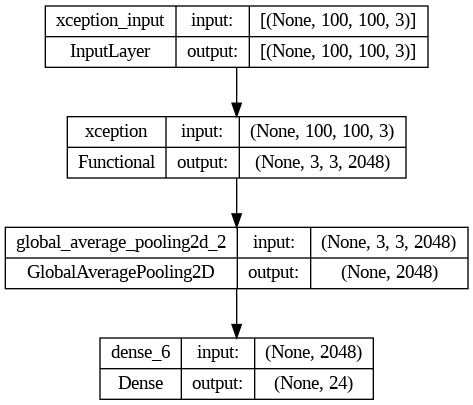

In [ ]:
from keras.utils import plot_model
from IPython.display import Image

# Carga del modelo
model = keras.models.load_model(r"modelo_Xception.h5")

# Guarda el resumen del modelo como una imagen
plot_model(model, to_file='model_summary.png', show_shapes=True, show_layer_names=True)

# Muestra la imagen en el cuaderno
Image("model_summary_Xception.png")

In [ ]:
predictions_Xception = model_Xception.predict(imgs, verbose=0)
print("predictions of resnet on a small set of test data--")
for ind, i in enumerate(predictions_Xception):
    print(reverse_mapping[np.argmax(i)], end='   ')

#plotImages(imgs)
print('\nActual labels')
for i in labels:
    print(reverse_mapping[np.argmax(i)], end='   ')

predictions of resnet on a small set of test data--
N   I   M   U   L   Y   B   U   D   P   Y   U   Y   Y   U   O   L   U   X   A   E   P   U   L   
Actual labels
N   I   M   K   L   R   B   U   D   P   Q   N   W   Y   B   O   L   I   X   A   E   P   X   Y   

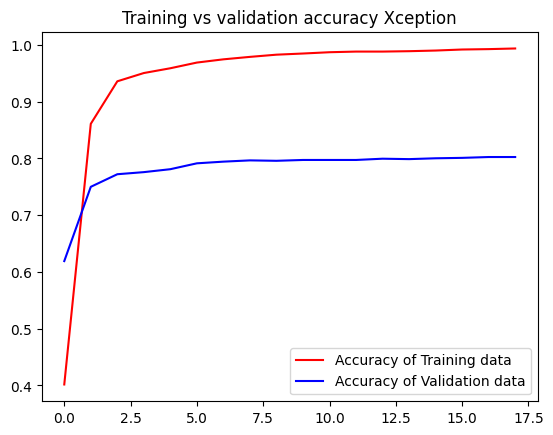

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = history_Xception.history['accuracy']
value_acc = history_Xception.history['val_accuracy']
get_loss = history_Xception.history['loss']
validation_loss = history_Xception.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy Xception')
plt.legend(loc=0)
plt.figure()
plt.show()

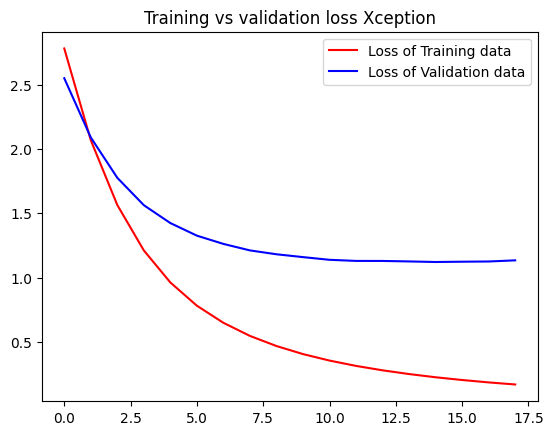

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss Xception')
plt.legend(loc=0)
plt.figure()
plt.show()